In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Загрузка и подготовка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# нормализуем
x_train = x_train / 255.0
x_test = x_test / 255.0
# готовим данные к CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
# преобразуем метки в one-hot формат
y_train_hot = to_categorical(y_train, 10)
y_test_hot = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Построение модели
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    # 64 фильтра
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    # защита от переобучения.
    layers.Dropout(0.3),

    # 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(), # превращаем 2D карту признаков в вектор.
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # финальный слой для 10 классов
])

In [ ]:
# Компиляция модели
model.compile(optimizer='adam', # автоматически настраивает скорость обучения.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# предотвращаем переобучение (завершаем обучение, если модель достигла оптимальной точки)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# адаптируем скорость обучения
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [ ]:
# Обучение модели
history = model.fit(
    x_train, y_train_hot,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 230s 299ms/step - accuracy: 0.7719 - loss: 1.2708 - val_accuracy: 0.8597 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 268s 308ms/step - accuracy: 0.8725 - loss: 0.7361 - val_accuracy: 0.8946 - val_loss: 0.6214 - learning_rate: 0.0010
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 260s 305ms/step - accuracy: 0.8808 - loss: 0.6681 - val_accuracy: 0.8872 - val_loss: 0.6339 - learning_rate: 0.0010
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 262s 304ms/step - accuracy: 0.8821 - loss: 0.6519 - val_accuracy: 0.8958 - val_loss: 0.6337 - learning_rate: 0.0010
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8890 - loss: 0.6515
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
750/750 ━━━━━━━━━━━━━━━━━━━━ 252s 291ms/step - accuracy: 0.8890 - loss: 0.6515 - val_accuracy: 0.8845 - val_loss: 0.6629 - learning_rate: 0.0010
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 273s 306ms/step - accuracy:

In [ ]:
# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test_hot)
print(f'\nРезультат точности:  {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9359 - loss: 0.3196

Результат точности:  0.9348


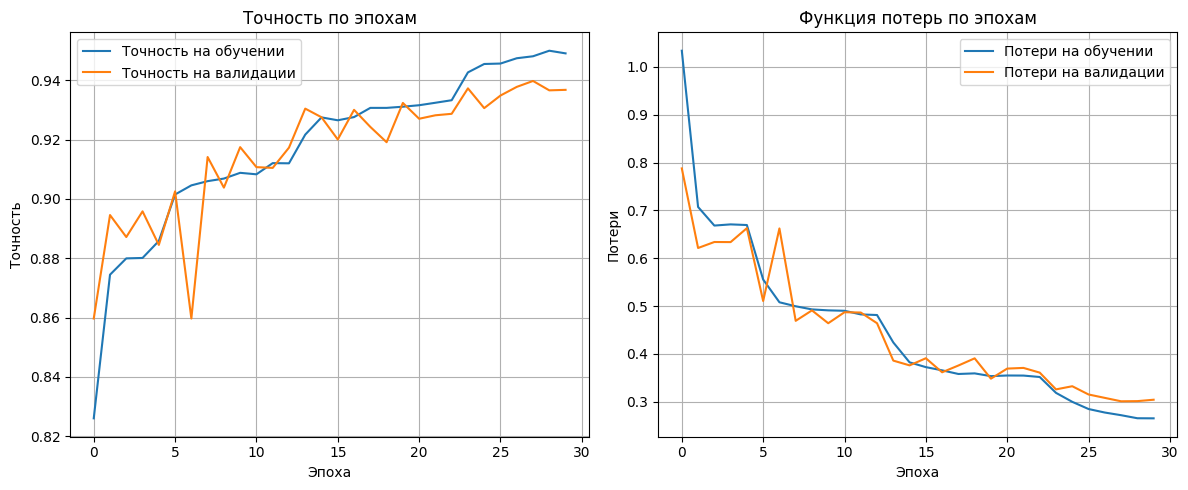

In [ ]:
# Построение графиков точности и потерь
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.title('Функция потерь по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()